# 🦠 Malaria Detection Using CNN and VGG19 (Transfer Learning)

This notebook presents two deep learning approaches to detect malaria from microscopic cell images:
1. A custom Convolutional Neural Network (CNN)
2. Transfer learning using **VGG19** pretrained on ImageNet

## 📌 Objectives
 - Detect malaria-infected cells from microscopy images
 - Compare performance of a custom CNN and a VGG19-based model
 - Use data augmentation to improve generalization

Dataset Source: [NIH Malaria Dataset](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria)



این پروژه با هدف شناسایی سلول‌های آلوده به مالاریا از تصاویر میکروسکوپی انجام شده و از دو رویکرد یادگیری عمیق استفاده می‌کند:

🧠 مدل اختصاصی CNN (شبکه عصبی کانولوشنی)
🔁 یادگیری انتقالی با استفاده از مدل VGG19 آموزش‌دیده بر روی ImageNet

📁 دیتاست
منبع: مجموعه داده NIH Malaria از Kaggle
شامل بیش از ۲۷۰۰۰ تصویر برچسب‌خورده از سلول‌های آلوده (Parasitized) و سالم (Uninfected)

🎯 اهداف پروژه
تشخیص بیماری مالاریا در تصاویر گلبول‌های قرمز با استفاده از یادگیری عمیق
مقایسه عملکرد مدل اختصاصی CNN با مدل VGG19 مبتنی بر یادگیری انتقالی
استفاده از افزایش داده (Data Augmentation) برای بهبود تعمیم‌پذیری مدل

📁  معماری مدل‌ها

✅ مدل اختصاصی CNN

شامل ۳ لایه کانولوشن به همراه لایه‌های Max Pooling
استفاده از Dropout برای جلوگیری از بیش‌برازش
لایه‌های Fully Connected در انتها برای دسته‌بندی

✅ مدل VGG19 (یادگیری انتقالی)

آموزش‌دیده بر روی دیتاست ImageNet
لایه‌های بالا به صورت خاص برای تشخیص مالاریا تنظیم مجدد شده‌اند (Fine-tuning)

📈 عملکرد مدل‌ها
🔬 مقایسه دقت اعتبارسنجی (Validation Accuracy) بین مدل CNN و VGG19
📉 نمودار دقت و خطا برای مدل اختصاصی CNN
📊 ماتریس درهم‌ریختگی (Confusion Matrix) برای مدل VGG19

🖼️ نمونه پیش‌بینی‌ها
تصویر	برچسب واقعی	پیش‌بینی مدل
✅	Parasitized	Parasitized
✅	Uninfected	Uninfected


🧠 تکنولوژی‌های مورد استفاده
Python
TensorFlow / Keras
Scikit-learn, Matplotlib
شبکه‌های عصبی کانولوشنی (CNN)
یادگیری انتقالی (Transfer Learning)

## 🔧 Import Required Libraries

In [68]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## 📁 Dataset Preparation


In [69]:
# Extract the dataset
with zipfile.ZipFile("/content/drive/MyDrive/Dataset-M.zip", 'r') as zip_ref:
    zip_ref.extractall("Dataset-M")

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [70]:
IMAGE_SIZE = [224, 224]
train_path = '/content/Dataset-M/Dataset/Train'
valid_path = '/content/Dataset-M/Dataset/Test'

# 🧠 1-Transfer Learning Using VGG19

# 1-1 Medel Definition

In [71]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze all VGG19 layers
for layer in vgg.layers:
    layer.trainable = False

In [72]:
# Count number of classes
folders = glob(train_path + '/*')


# Build the model
x = Flatten()(vgg.output)

# Define the prediction layer with the correct number of classes
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model, ensuring the prediction layer is correctly incorporated
model_vgg = Model(inputs=vgg.input, outputs=prediction)

model_vgg.summary()


Model: "functional_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

## 1-2 ⚙️ Compile and Preprocess Model VGG19

In [73]:
model = model_vgg  # Change to model_cnn if testing CNN model

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# توضیح مرحله آموزش مدل‌ها

- مدل‌های هوش مصنوعی از تصاویر آموزش می‌بینند تا ویژگی‌های مهم سلول‌های سالم و بیمار را یاد بگیرند.  
- هر مدل در چند مرحله روی تصاویر مختلف آموزش داده می‌شود که به آن «اپوک» (Epoch) گفته می‌شود.  
- در هر اپوک، مدل بهتر و بهتر می‌شود و دقت تشخیصش افزایش می‌یابد.

در این پروژه، دو مدل آموزش داده شدند:  
- مدل CNN ساده که خودمان طراحی کردیم  
- مدل VGG19 که از قبل آموزش دیده و فقط برای این پروژه تنظیم شد

نتایج آموزش هر مدل با نمودارهای دقت و خطا نشان داده شده است.


## 1-3 🏋️ Train the Model VGG19

In [74]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 427s 33s/step - accuracy: 0.4986 - loss: 1.9354 - val_accuracy: 0.6791 - val_loss: 0.6691
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 481s 37s/step - accuracy: 0.6059 - loss: 0.7726 - val_accuracy: 0.6567 - val_loss: 0.6264
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 500s 36s/step - accuracy: 0.7614 - loss: 0.4989 - val_accuracy: 0.7239 - val_loss: 0.5059
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 462s 33s/step - accuracy: 0.8317 - loss: 0.4443 - val_accuracy: 0.7910 - val_loss: 0.4661
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 443s 33s/step - accuracy: 0.8575 - loss: 0.3318 - val_accuracy: 0.8134 - val_loss: 0.4529
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 482s 37s/step - accuracy: 0.8991 - loss: 0.2899 - val_accuracy: 0.7836 - val_loss: 0.4459
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 461s 33s/step - accuracy: 0.8903 - loss: 0.2735 - val_accuracy: 0.6493 - val_loss: 0.6219
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 441s 33s/step - accuracy: 0.8663 - loss: 0.3339 - val_accuracy: 0.

## 1-4 📊 Visualize Training Results


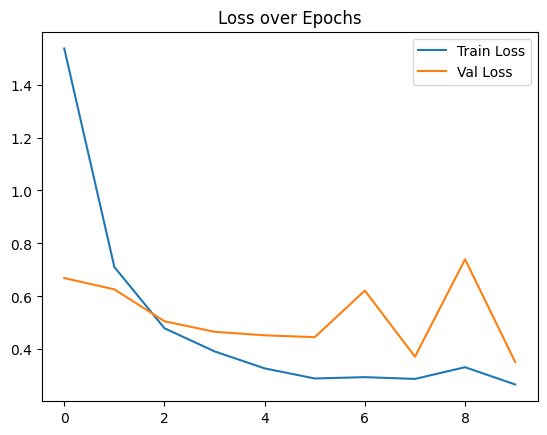

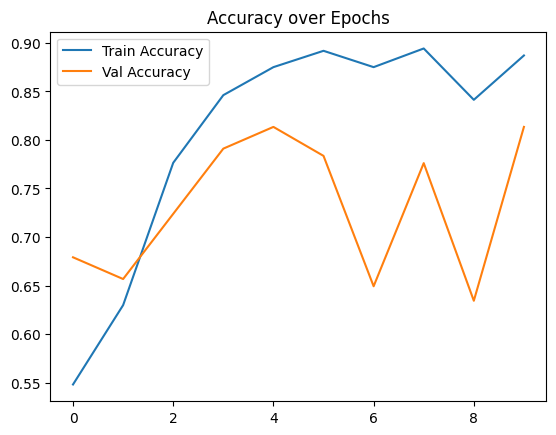

In [76]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

##1-5 💾 Save the Model

In [77]:
model.save('model_vgg19.h5')

## 1-6 Confusion Matrix & Classification Report

5/5 ━━━━━━━━━━━━━━━━━━━━ 103s 20s/step


<Figure size 600x600 with 0 Axes>

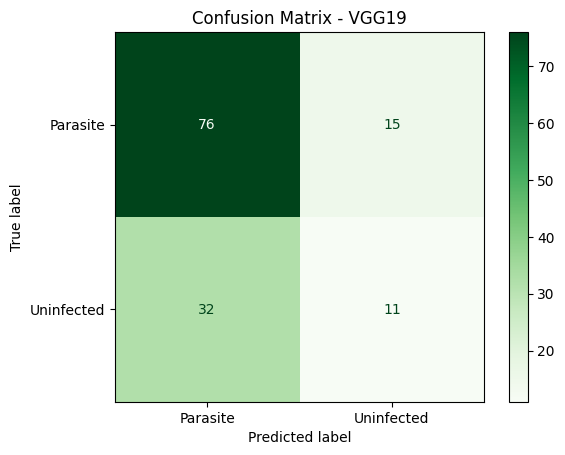

              precision    recall  f1-score   support

    Parasite       0.70      0.84      0.76        91
  Uninfected       0.42      0.26      0.32        43

    accuracy                           0.65       134
   macro avg       0.56      0.55      0.54       134
weighted avg       0.61      0.65      0.62       134



In [78]:
from tensorflow.keras.models import load_model
import math
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

model = load_model('model_vgg19.h5')  # Load your saved model
vgg19_pred_probs = model.predict(test_set, steps=math.ceil(val_samples / BATCH_SIZE))  # Predict using the model

# Convert probabilities to class labels
vgg19_pred = np.argmax(vgg19_pred_probs, axis=1)

y_true = test_set.classes

# Confusion Matrix
cm_vgg = confusion_matrix(y_true, vgg19_pred)
disp_vgg = ConfusionMatrixDisplay(confusion_matrix=cm_vgg, display_labels=test_set.class_indices.keys())

plt.figure(figsize=(6, 6))
disp_vgg.plot(cmap=plt.cm.Greens, values_format="d")
plt.title("Confusion Matrix - VGG19")
plt.savefig("VGG19_ConfusionMatrix.png")
plt.show()

# Classification Report
print(classification_report(y_true, vgg19_pred, target_names=test_set.class_indices.keys()))


# 2-🧠 CNN Model from Scratch (For Comparison)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [80]:
model_cnn = Sequential()
model_cnn.add(Conv2D(16, kernel_size=2, padding="same", activation="relu", input_shape=(224,224,3)))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Conv2D(32, kernel_size=2, padding="same", activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Conv2D(64, kernel_size=2, padding="same", activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(500, activation="relu"))
model_cnn.add(Dense(2, activation="softmax"))
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 500)            │    25,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,100,046 (95.75 MB)

 Trainable params: 25,100,046 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

# 2-1 Model Definition

In [81]:
def create_custom_cnn(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    return model

## 2-2 ⚙️ Compile and Preprocess Model

In [82]:
# Change the input shape of the create_custom_cnn function to match the actual image size
custom_cnn_model = create_custom_cnn(input_shape=(224, 224, 3))

# Recompile the model with the updated input shape
custom_cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

##2-3 🏋️ Train the Model

In [83]:
# Use flow_from_directory to generate data for training and validation
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if you have only 2 classes
)

validation_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'  # Use 'binary' if you have only 2 classes
)

cnn_history = custom_cnn_model.fit(
    training_set,
    validation_data=validation_set, # Pass the validation_set here
    epochs=5,
    callbacks=[early_stop]
)

custom_cnn_model.save('/content/custom_cnn_model.h5')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.5046 - loss: 0.7053 - val_accuracy: 0.3433 - val_loss: 0.7630
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.5641 - loss: 0.6807 - val_accuracy: 0.3731 - val_loss: 0.7431
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.6609 - loss: 0.6315 - val_accuracy: 0.3731 - val_loss: 0.7696
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7312 - loss: 0.5912 - val_accuracy: 0.3731 - val_loss: 0.8736
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.7461 - loss: 0.5357 - val_accuracy: 0.3731 - val_loss: 0.8804


## 2-4 📊 Visualize Training Results

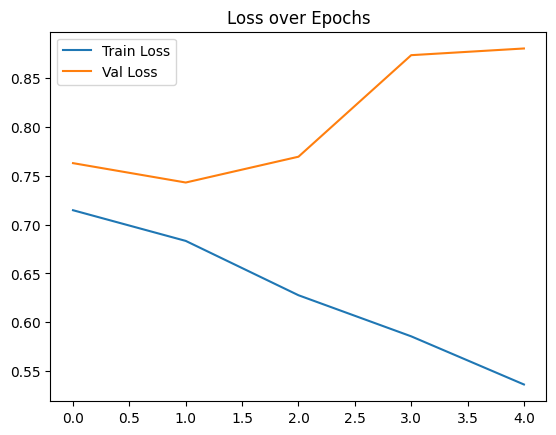

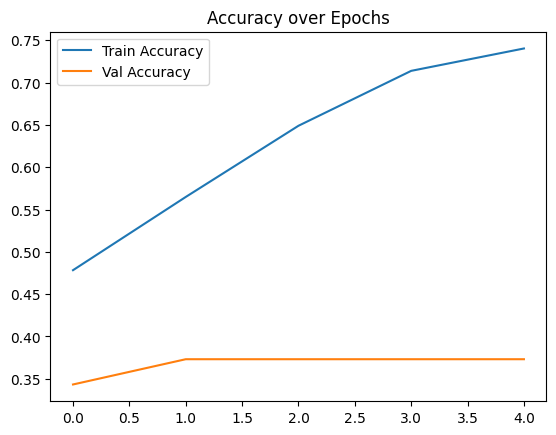

In [84]:
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 747ms/step
y_true: 134, y_pred: 134


<Figure size 600x600 with 0 Axes>

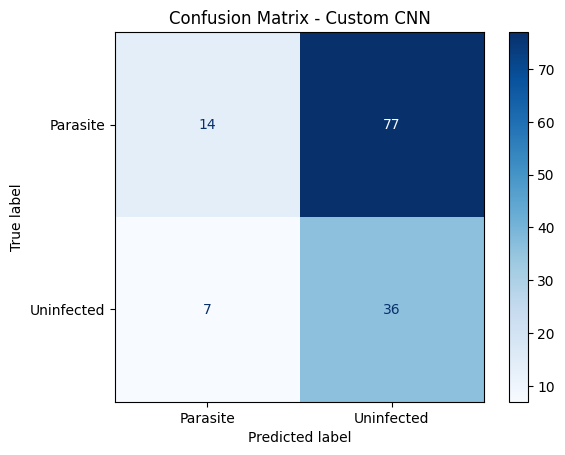

              precision    recall  f1-score   support

    Parasite       0.67      0.15      0.25        91
  Uninfected       0.32      0.84      0.46        43

    accuracy                           0.37       134
   macro avg       0.49      0.50      0.36       134
weighted avg       0.55      0.37      0.32       134



In [85]:
import math
# Number of validation samples
val_samples = validation_set.samples
BATCH_SIZE = 32
# Predict with correct number of steps
y_pred = custom_cnn_model.predict(validation_set, steps=math.ceil(val_samples / BATCH_SIZE))
# Get predicted class labels by selecting the index with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_set.classes

# Ensure same length
print(f"y_true: {len(y_true)}, y_pred: {len(y_pred_classes)}")  # Optional check

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_set.class_indices.keys())

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Custom CNN")
plt.savefig("Custom_CNN_ConfusionMatrix.png")
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=validation_set.class_indices.keys()))

# Models Compaire

✅ Custom CNN Validation Accuracy: 0.3731
✅ VGG19 Validation Accuracy:     0.8134


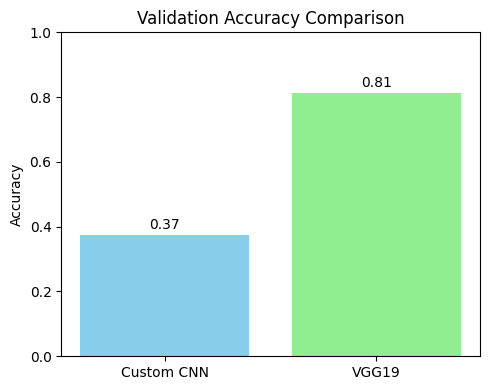

In [86]:
# Get final validation accuracy
cnn_val_acc = cnn_history.history['val_accuracy'][-1]
vgg19_val_acc = r.history['val_accuracy'][-1]

# Print comparison
print(f"✅ Custom CNN Validation Accuracy: {cnn_val_acc:.4f}")
print(f"✅ VGG19 Validation Accuracy:     {vgg19_val_acc:.4f}")

# Optional: Display as bar chart
plt.figure(figsize=(5, 4))
models = ['Custom CNN', 'VGG19']
accuracies = [cnn_val_acc, vgg19_val_acc]
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title("Validation Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("Model_Accuracy_Comparison.png")
plt.show()


## ✅ Conclusion


- The VGG19 model with transfer learning performed better than the custom CNN.
- The model can effectively classify malaria-infected and uninfected blood cells.